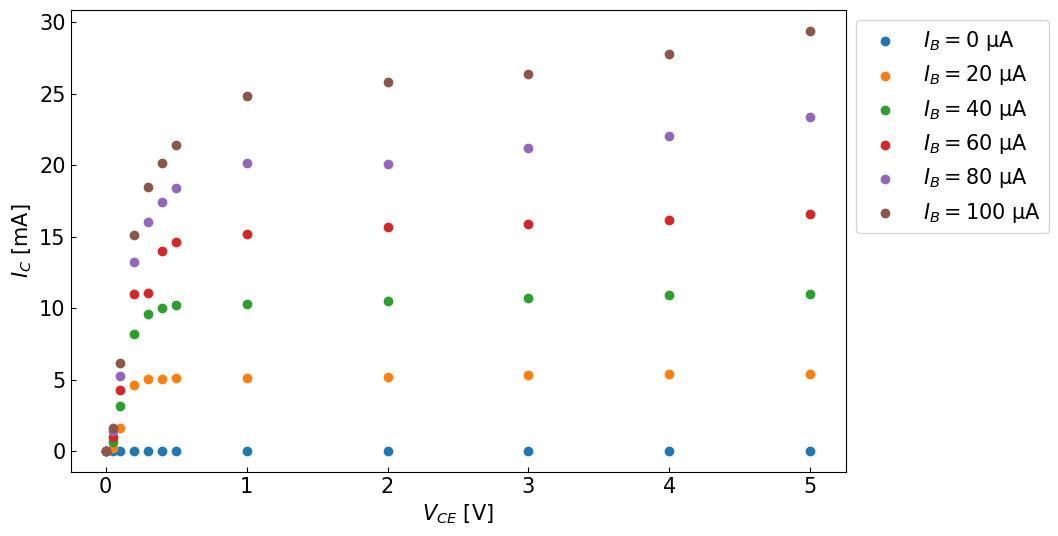

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Excelファイルからデータを読み込む
file_path = 'data.xlsx'  # ファイルのパスを指定してください
sheet_name = 'emitter'          # シート名を指定してください

# Excelファイルから指定のシートを読み込む
df = pd.read_excel(file_path, sheet_name=sheet_name)

# データフレームからx軸のデータを抽出
x_values = df['V_{CE}']

# y軸のデータを抽出
y_labels = [0, 20, 40, 60, 80, 100]
y_values_list = [df[y] for y in y_labels]

# 散布図を重ねて作成
plt.figure(figsize=(10, 6))
for i in range(len(y_values_list)):
  plt.scatter(x_values, y_values_list[i], marker='o', label=f'$I_B = {y_labels[i]}$ μA')

plt.xlabel(r'$V_{CE}$ [V]', fontsize=15)  # x軸ラベルのフォントサイズを設定
plt.ylabel('$I_C$ [mA]', fontsize=15)     # y軸ラベルのフォントサイズを設定
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)  # 凡例のフォントサイズを設定

plt.tick_params(axis='both', direction='in', labelsize=15)  # メモリの文字のフォントサイズを設定

# グラフを保存
plt.savefig('figs/emitter1.pdf', bbox_inches='tight')
# グラフを表示
plt.show()


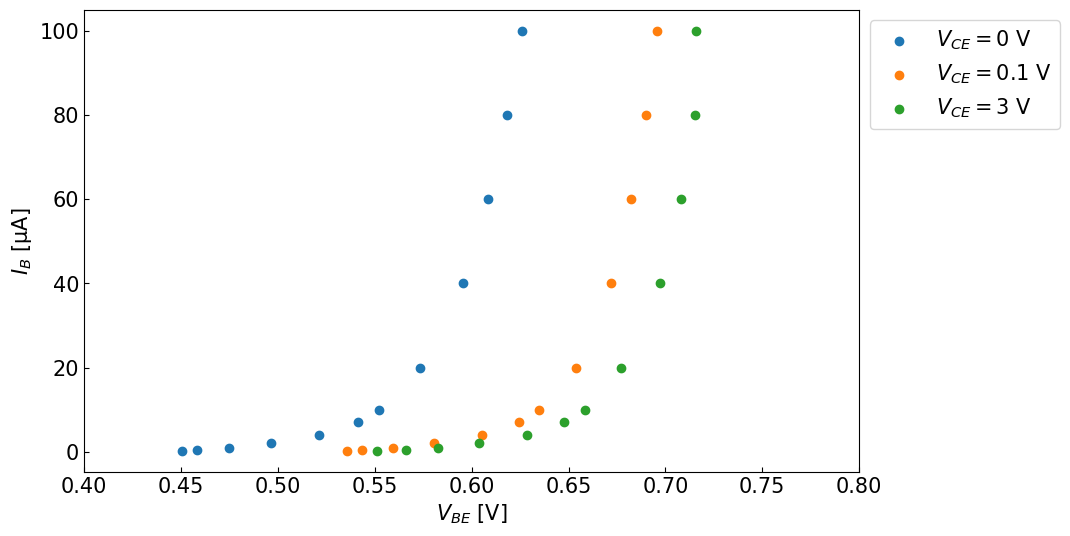

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Excelファイルからデータを読み込む
file_path = 'data.xlsx'  # ファイルのパスを指定してください
sheet_name = 'emitter2'          # シート名を指定してください

# Excelファイルから指定のシートを読み込む
df = pd.read_excel(file_path, sheet_name=sheet_name)

# データフレームからx軸のデータを抽出
y_values = df['I_{B}']

# y軸のデータを抽出
x_labels = [0, 0.1, 3]
x_values_list = [df[x] for x in x_labels]

# 散布図を重ねて作成
plt.figure(figsize=(10, 6))
for i in range(len(x_values_list)):
    plt.scatter(x_values_list[i], y_values, marker='o', label=r'$V_{CE}='f'{x_labels[i]}$ V')

plt.xlabel(r'$V_{BE}$ [V]', fontsize=15)  # x軸ラベルのフォントサイズを設定
plt.ylabel('$I_B$ [μA]', fontsize=15)      # y軸ラベルのフォントサイズを設定
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)  # 凡例のフォントサイズを設定

# x軸の範囲を設定
plt.xlim(0.4, 0.8)


plt.tick_params(axis='both', direction='in', labelsize=15)  # メモリの文字のフォントサイズを設定

# グラフを保存
plt.savefig('figs/emitter2.pdf', bbox_inches='tight')
# グラフを表示
plt.show()


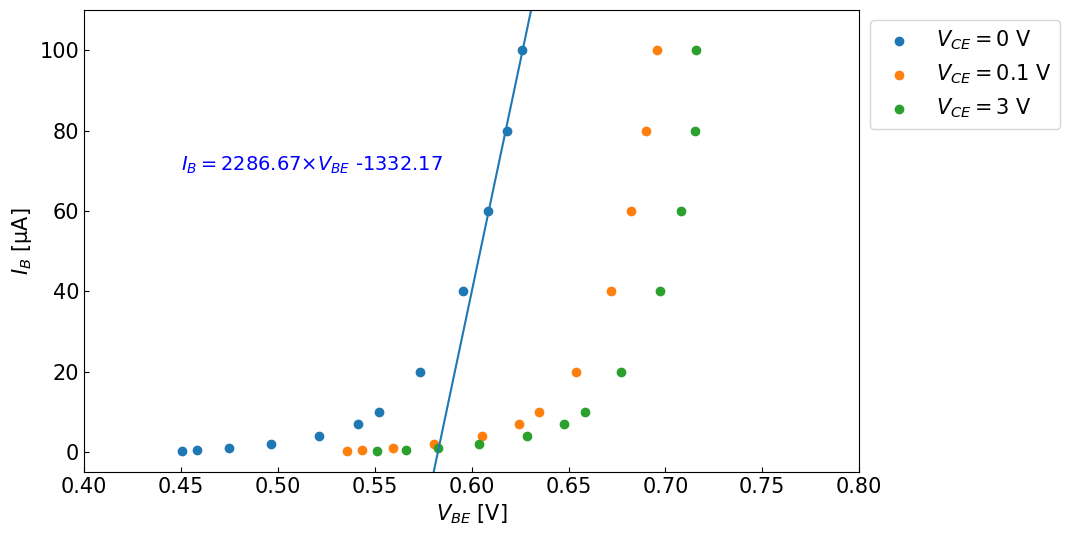

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Excelファイルからデータを読み込む
file_path = 'data.xlsx'  # ファイルのパスを指定してください
sheet_name = 'emitter2'   # シート名を指定してください

# Excelファイルから指定のシートを読み込む
df = pd.read_excel(file_path, sheet_name=sheet_name)

# データフレームからx軸のデータを抽出
y_values = df['I_{B}']

# x軸のデータを抽出
x_labels = [0, 0.1, 3]
x_values_list = [df[x] for x in x_labels]

# 散布図を重ねて作成
plt.figure(figsize=(10, 6))
for i in range(len(x_values_list)):
    plt.scatter(x_values_list[i], y_values, marker='o', label=r'$V_{CE}='f'{x_labels[i]}$ V')

plt.xlabel(r'$V_{BE}$ [V]', fontsize=15)  # x軸ラベルのフォントサイズを設定
plt.ylabel('$I_B$ [μA]', fontsize=15)      # y軸ラベルのフォントサイズを設定
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)  # 凡例のフォントサイズを設定

# x軸の範囲を設定
plt.xlim(0.4, 0.8)
plt.ylim(-5, 110)

plt.tick_params(axis='both', direction='in', labelsize=15)  # メモリの文字のフォントサイズを設定

line_colors = ['blue', 'orange', 'green']
# 線形回帰を行う
for i in range(1):
    x = x_values_list[i][[9, 10, 11]].values.reshape(-1, 1)
    y = y_values[[9, 10, 11]].values
    reg = LinearRegression().fit(x, y)
    x_pred = np.linspace(0.4, 0.8, 100).reshape(-1, 1)
    y_pred = reg.predict(x_pred)
    plt.plot(x_pred, y_pred, label=f'Linear Fit $V_{{CE}}={x_labels[i]}$ V')
    
    # 傾きと切片を取得
    m_i = reg.coef_[0]
    b_i = reg.intercept_
    
    # 近似直線の式を表示
    equation_text = r'$I_B = $'f'{m_i:.2f}' r'$\times V_{BE}$'f' {b_i:.2f}'
    
    # テキストをグラフ内に表示
    plt.text(0.45, 70 - i * 10, equation_text, fontsize=14, color=line_colors[i])

# グラフを保存
plt.savefig('figs/emitter2.pdf', bbox_inches='tight')
# グラフを表示
plt.show()



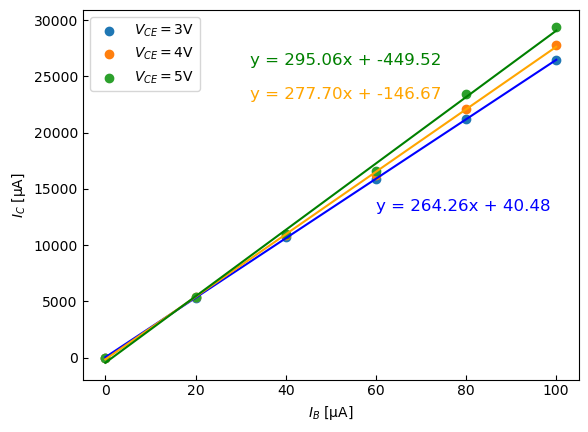

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Excelファイルからデータを読み込む
file_path = 'data.xlsx'  # ファイルのパスを指定してください
sheet_name = 'emitter'   # シート名を指定してください

# Excelファイルから指定のシートを読み込む
df = pd.read_excel(file_path, sheet_name=sheet_name)

# x_dataを更新して新しいデータを追加
x_data = [0, 20, 40, 60, 80, 100]  # 4Vと5Vのデータを追加

# y_dataを更新して新しいデータを追加
y_data = df['3V'][:len(x_data)]  # 3Vのデータを更新
y_data_4V = df['4V'][:len(x_data)]  # 4Vのデータを追加
y_data_5V = df['5V'][:len(x_data)]  # 5Vのデータを追加

# 散布図をプロット
plt.scatter(x_data, y_data, label=r'$V_{CE}=3$V')
plt.scatter(x_data, y_data_4V, label=r'$V_{CE}=4$V')  # 4Vのデータをプロット
plt.scatter(x_data, y_data_5V, label=r'$V_{CE}=5$V')  # 5Vのデータをプロット

# 線形回帰を実行して近似直線を追加
# 線形回帰を実行して近似直線を追加
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
plt.plot(x_data, slope * pd.Series(x_data) + intercept, color='blue')
plt.text(60, 13000, f'y = {slope:.2f}x + {intercept:.2f}', color='blue', fontsize=12)

slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data_4V)
plt.plot(x_data, slope * pd.Series(x_data) + intercept, color='orange')
plt.text(32, 23000, f'y = {slope:.2f}x + {intercept:.2f}', color='orange', fontsize=12)

slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data_5V)
plt.plot(x_data, slope * pd.Series(x_data) + intercept, color='green')
plt.text(32, 26000, f'y = {slope:.2f}x + {intercept:.2f}', color='green', fontsize=12)

# グラフのラベルとメモリ線を設定
plt.xlabel(r'$I_B$ [μA]')
plt.ylabel(r'$I_C$ [μA]')
plt.legend()
plt.tick_params(axis='both', direction='in')

# グラフを保存
plt.savefig('figs/h_fe.pdf')
# グラフを表示
plt.show()


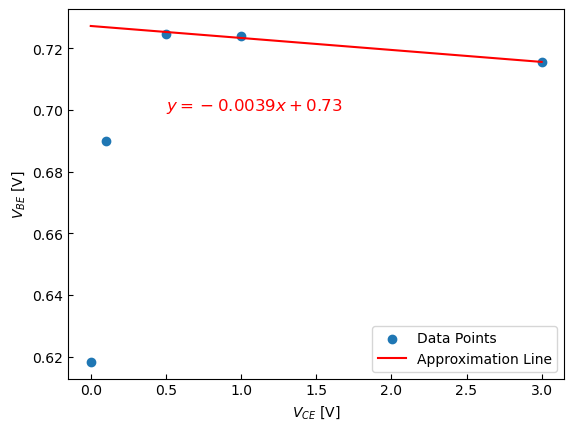

'y = -0.00388571x + 0.73'

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Excelファイルからデータを読み込む
file_path = 'data.xlsx'  # ファイルのパスを指定してください
sheet_name = 'emitter2'   # シート名を指定してください

# Excelファイルから指定のシートを読み込む
df = pd.read_excel(file_path, sheet_name=sheet_name)

x_data = [0, 0.1, 0.5, 1, 3]
y_data = df['V_{BE}(h_{re})'][:len(x_data)]

# 散布図をプロット（1番目から5番目までのデータを含める）
plt.scatter(x_data, y_data, label='Data Points')

# 線形回帰を実行し、直線のパラメータを取得（3番目から5番目のデータを使用）
slope, intercept, r_value, p_value, std_err = linregress(x_data[2:], y_data[2:])
line_eq = f'y = {slope:.8f}x + {intercept:.2f}'

# plt.annotate(line_eq, (50,0), xytext=(10, 90), textcoords='offset points', fontsize=12, color='red')
# 直線をプロット
plt.plot(x_data, slope * pd.Series(x_data) + intercept, color='red', label='Approximation Line')

plt.text(0.5, 0.7, r'$y = -0.0039x + 0.73$', fontsize=12, color='red')

# グラフのラベルとメモリ線を設定
plt.xlabel(r'$V_{CE}$ [V]')
plt.ylabel(r'$V_{BE}$ [V]')
plt.legend()
plt.tick_params(axis='both', direction='in')

# グラフを保存
plt.savefig('figs/h_re.pdf')
# グラフを表示
plt.show()

line_eq

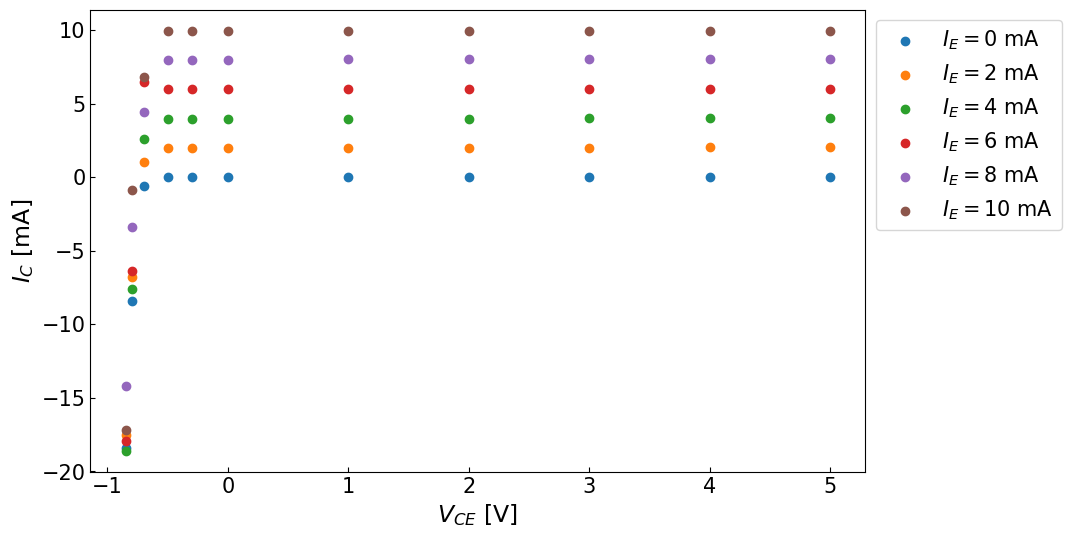

In [105]:
import pandas as pd
import matplotlib.pyplot as plt

# Excelファイルからデータを読み込む
file_path = 'data.xlsx'  # ファイルのパスを指定してください
sheet_name = 'base'          # シート名を指定してください

# Excelファイルから指定のシートを読み込む
df = pd.read_excel(file_path, sheet_name=sheet_name)

# データフレームからx軸のデータを抽出
x_values = df['V_CB']

# y軸のデータを抽出
y_labels = [0, 2, 4, 6, 8, 10]
y_values_list = [df[y] for y in y_labels]

# 散布図を重ねて作成
plt.figure(figsize=(10, 6))
for i in range(len(y_values_list)):
    plt.scatter(x_values, y_values_list[i], marker='o', label=f'$I_E = {y_labels[i]}$ mA')

plt.xlabel(r'$V_{CE}$ [V]', fontsize=17)  # x軸ラベルのフォントサイズを設定
plt.ylabel('$I_C$ [mA]', fontsize=17)      # y軸ラベルのフォントサイズを設定
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)  # 凡例のフォントサイズを設定

plt.tick_params(axis='both', direction='in', labelsize=15)  # メモリの文字のフォントサイズを設定

# グラフを保存
plt.savefig('figs/base1.pdf', bbox_inches='tight')
# グラフを表示
plt.show()


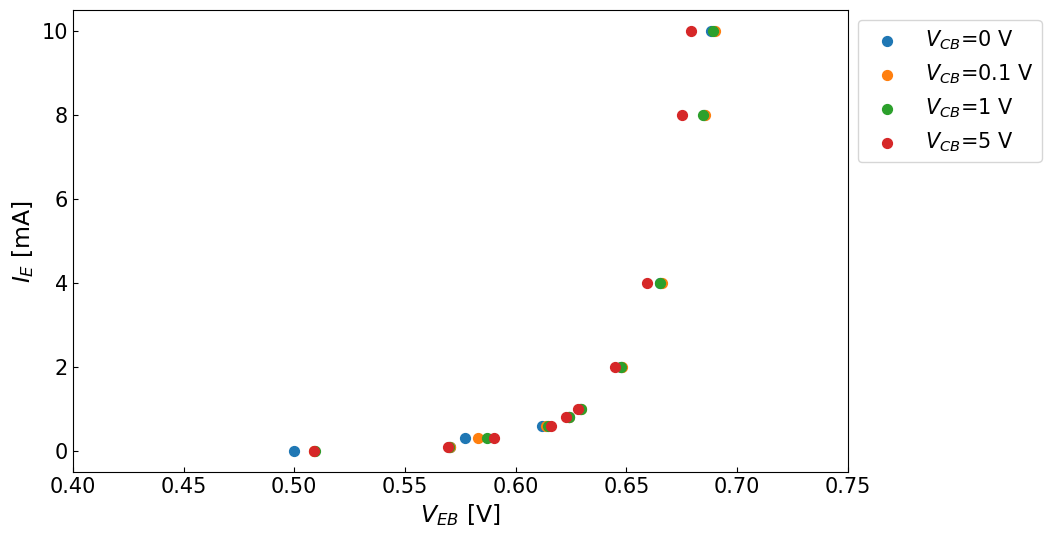

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Excelファイルからデータを読み取る
file_path = 'data.xlsx'  # Excelファイルのパスを指定してください
sheet_name = 'base2'
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 指定されたデータを抽出
x_values = [0, 0.1, 1, 5]
y_values = ['I_E', 'I_E', 'I_E', 'I_E']

plt.figure(figsize=(10, 6))
# グラフを描画
for x, y in zip(x_values, y_values):
    plt.scatter(df[x], df[y], label=r'$V_{CB}$'f'={x} V', marker='o', s=50)  # マーカーのサイズを設定

# ラベルと凡例を設定
plt.xlabel(r'$V_{EB}$ [V]', fontsize=17)  # x軸ラベルのフォントサイズを設定
plt.ylabel(r'$I_E$ [mA]', fontsize=17)     # y軸ラベルのフォントサイズを設定
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=15)  # 凡例のフォントサイズを設定

plt.tick_params(axis='both', direction='in', labelsize=15)  # メモリの文字のフォントサイズを設定
plt.xlim(0.4, 0.75)
# グラフを保存
plt.savefig('figs/base2.pdf', bbox_inches='tight')
# グラフを表示
plt.show()


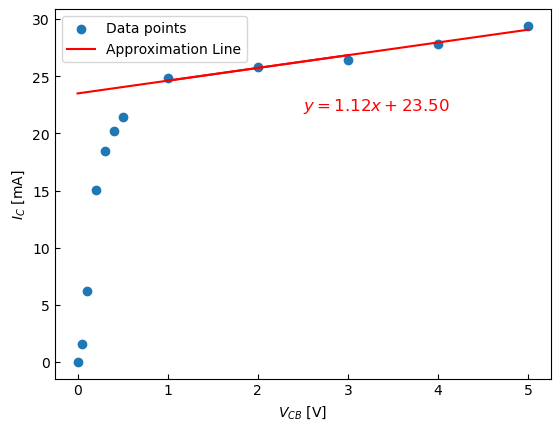

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Excelファイルからデータを読み込む
file_path = 'data.xlsx'  # ファイルのパスを指定してください
sheet_name = 'emitter'          # シート名を指定してください

# Excelファイルから指定のシートを読み込む
df = pd.read_excel(file_path, sheet_name=sheet_name)

# データフレームからx軸のデータを抽出
x_values = df['V_{CE}']

# y軸のデータを抽出
y_labels = [100]
y_values_list = [df[y] for y in y_labels]

# 散布図を重ねて作成
for i in range(len(y_values_list)):
    plt.scatter(x_values, y_values_list[i], marker='o', label='Data points')

# 線形回帰を実行
x_subset = x_values[7:12]  # 8番目から11番目のデータを選択
y_subset = y_values_list[0][7:12]  # 8番目から11番目のデータを選択
slope, intercept, r_value, p_value, std_err = stats.linregress(x_subset, y_subset)

# 近似直線の式
line_eq = f'$y = {slope:.2f}x + {intercept:.2f}$'

# 近似直線をプロット
plt.plot(x_subset, slope * x_subset + intercept, color='red')

# 近似直線の式を表示
plt.text(2.5, 22, line_eq, fontsize=12, color='red')
plt.plot(x_data, slope * pd.Series(x_data) + intercept, color='red', label='Approximation Line')
plt.xlabel(r'$V_{CB}$ [V]')
plt.ylabel('$I_C$ [mA]')
plt.legend()

plt.tick_params(axis='both', direction='in')
# グラフを保存
plt.savefig('figs/h_oe.pdf', bbox_inches='tight')
# グラフを表示
plt.show()


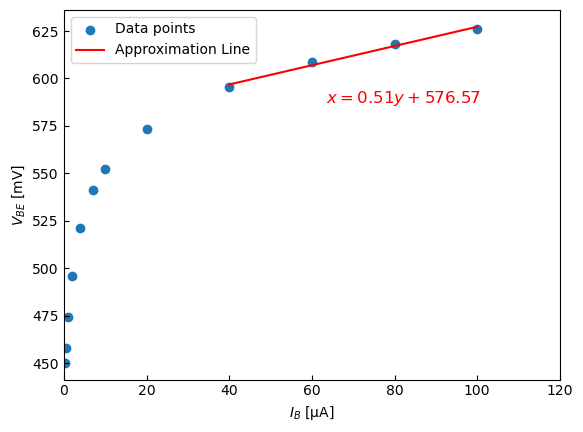

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Excelファイルからデータを読み込む
file_path = 'data.xlsx'  # ファイルのパスを指定してください
sheet_name = 'emitter2'          # シート名を指定してください

# Excelファイルから指定のシートを読み込む
df = pd.read_excel(file_path, sheet_name=sheet_name)

# データフレームからx軸のデータを抽出
x_labels = [0]
x_values_list = [df[x] for x in x_labels]

# y軸のデータを抽出
y_values = df['I_{B}']

# 散布図を重ねて作成
for i in range(len(x_values_list)):
    plt.scatter(y_values, x_values_list[i], marker='o', label='Data points')

# 線形回帰を実行
x_subset = y_values[8:13]  # 11番目から13番目のデータを選択
y_subset = x_values_list[0][8:13]  # 11番目から13番目のデータを選択
slope, intercept, r_value, p_value, std_err = stats.linregress(x_subset, y_subset)

# 近似直線の式
line_eq = f'$x = {slope:.2f}y + {intercept:.2f}$'

# 近似直線をプロット
plt.plot(x_subset, slope * x_subset + intercept, color='red', label='Approximation Line')

# 近似直線の式を表示
plt.annotate(line_eq, (60, 580), xytext=(10, 10), textcoords='offset points', fontsize=12, color='red')

plt.xlabel('$I_B$ [μA]')
plt.ylabel(r'$V_{BE}$ [mV]')
plt.legend()

# x軸の範囲を設定
plt.xlim(0, 120)

plt.tick_params(axis='both', direction='in')
# グラフを保存
plt.savefig('figs/h_ie.pdf', bbox_inches='tight')
# グラフを表示
plt.show()


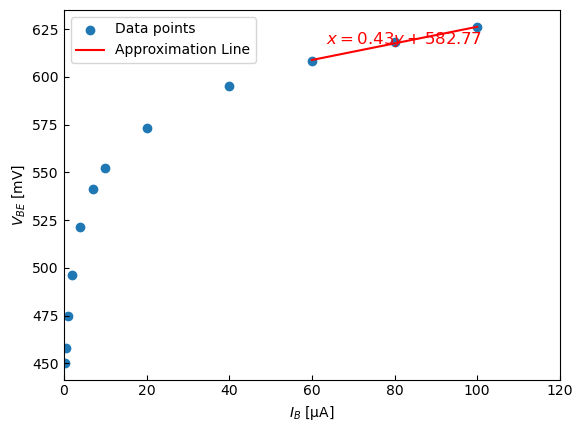

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Excelファイルからデータを読み込む
file_path = 'data.xlsx'  # ファイルのパスを指定してください
sheet_name = 'emitter2'          # シート名を指定してください

# Excelファイルから指定のシートを読み込む
df = pd.read_excel(file_path, sheet_name=sheet_name)

# データフレームからx軸のデータを抽出
x_labels = [0]
x_values_list = [df[x] for x in x_labels]

# y軸のデータを抽出
y_values = df['I_{B}']

# 散布図を重ねて作成
for i in range(len(x_values_list)):
    plt.scatter(y_values, x_values_list[i], marker='o', label='Data points')

# 線形回帰を実行
x_subset = y_values[9:13]  # 11番目から13番目のデータを選択
y_subset = x_values_list[0][9:13]  # 11番目から13番目のデータを選択
slope, intercept, r_value, p_value, std_err = stats.linregress(x_subset, y_subset)

# 近似直線の式
line_eq = f'$x = {slope:.2f}y + {intercept:.2f}$'

# 近似直線をプロット
plt.plot(x_subset, slope * x_subset + intercept, color='red', label='Approximation Line')

# 近似直線の式を表示
plt.annotate(line_eq, (60, 610), xytext=(10, 10), textcoords='offset points', fontsize=12, color='red')

plt.xlabel('$I_B$ [μA]')
plt.ylabel(r'$V_{BE}$ [mV]')
plt.legend()

# x軸の範囲を設定
plt.xlim(0, 120)

plt.tick_params(axis='both', direction='in')
# グラフを保存
plt.savefig('figs/emitter2.pdf', bbox_inches='tight')
# グラフを表示
plt.show()


In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Excelファイルからデータを読み込む
file_path = 'data.xlsx'  # ファイルのパスを指定してください
sheet_name = 'base'   # シート名を指定してください

# Excelファイルから指定のシートを読み込む
df = pd.read_excel(file_path, sheet_name=sheet_name)

# x_dataを更新して新しいデータを追加
x_data = [0, 2, 4, 6, 8, 10]  # 4Vと5Vのデータを追加

# y_dataを更新して新しいデータを追加
y_data = df['3V'][:len(x_data)]  # 3Vのデータを更新
y_data_4V = df['4V'][:len(x_data)]  # 4Vのデータを追加
y_data_5V = df['5V'][:len(x_data)]  # 5Vのデータを追加

# 散布図をプロット
plt.scatter(x_data, y_data, label=r'$V_{CE}=3$V')
plt.scatter(x_data, y_data_4V, label=r'$V_{CE}=4$V')  # 4Vのデータをプロット
plt.scatter(x_data, y_data_5V, label=r'$V_{CE}=5$V')  # 5Vのデータをプロット

# 線形回帰を実行して近似直線を追加
# 線形回帰を実行して近似直線を追加
slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data)
plt.plot(x_data, slope * pd.Series(x_data) + intercept, color='blue')
plt.text(60, 13000, f'y = {slope:.2f}x + {intercept:.2f}', color='blue', fontsize=12)

slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data_4V)
plt.plot(x_data, slope * pd.Series(x_data) + intercept, color='orange')
plt.text(32, 23000, f'y = {slope:.2f}x + {intercept:.2f}', color='orange', fontsize=12)

slope, intercept, r_value, p_value, std_err = linregress(x_data, y_data_5V)
plt.plot(x_data, slope * pd.Series(x_data) + intercept, color='green')
plt.text(32, 26000, f'y = {slope:.2f}x + {intercept:.2f}', color='green', fontsize=12)

# グラフのラベルとメモリ線を設定
plt.xlabel(r'$I_B$ [μA]')
plt.ylabel(r'$I_C$ [μA]')
plt.legend()
plt.tick_params(axis='both', direction='in')

# グラフを表示
plt.show()


ValueError: Image size of 2936x875985 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>